In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('loan_sanction/loan_sanction_train.csv')
test = pd.read_csv('loan_sanction/loan_sanction_test.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train.shape

(614, 13)

In [9]:
test.shape

(367, 12)

In [10]:
freq = train['Loan_Status'].value_counts()

In [11]:
freq

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [12]:
per = train['Loan_Status'].value_counts(normalize=True)*100

In [13]:
per

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

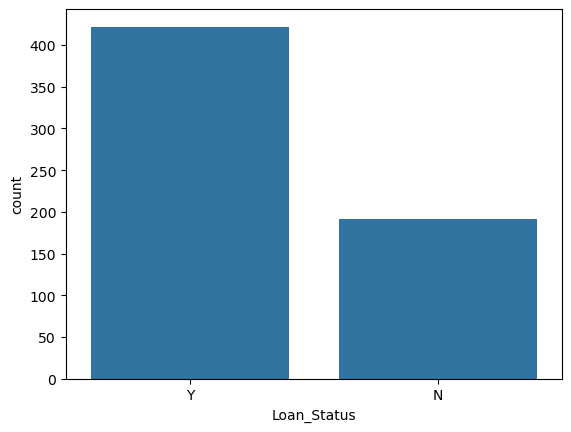

In [14]:
sns.countplot(x='Loan_Status',data=train)
plt.show()

In [15]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
cat_col = train[['Gender','Married','Self_Employed']]

Gender
Male      489
Female    112
Name: count, dtype: int64
Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64


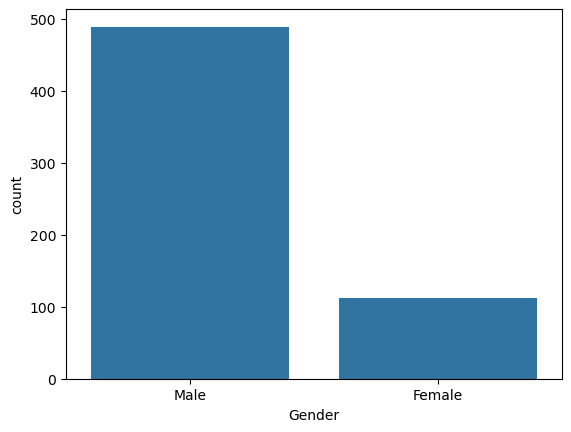

Married
Yes    398
No     213
Name: count, dtype: int64
Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64


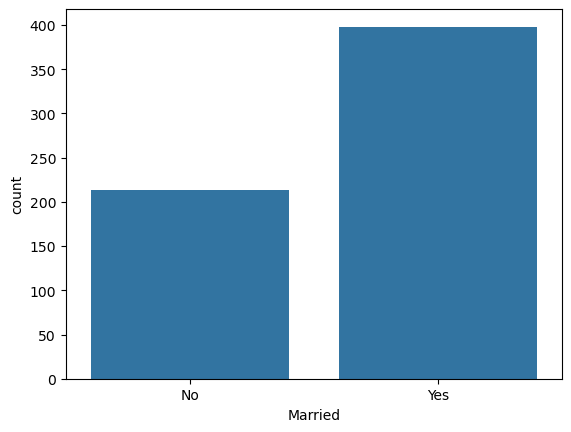

Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64


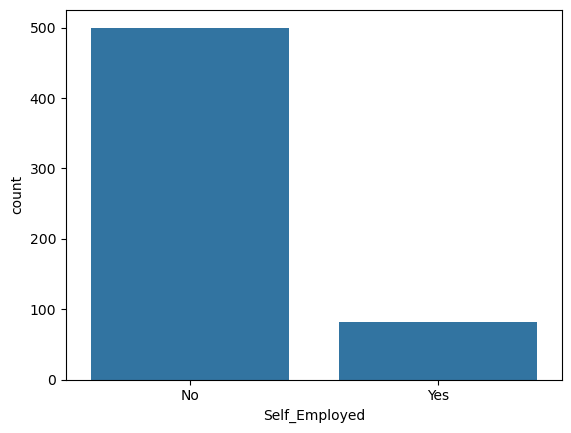

In [17]:
for c in cat_col:
    print(train[c].value_counts())
    print(train[c].value_counts(normalize=True)*100)
    sns.countplot(x=c,data=train)
    plt.show()

In [18]:
ord_col = train[['Dependents', 'Education','Property_Area']]

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64


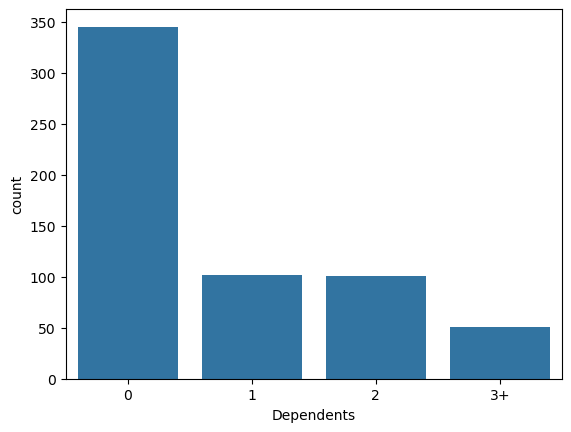

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64


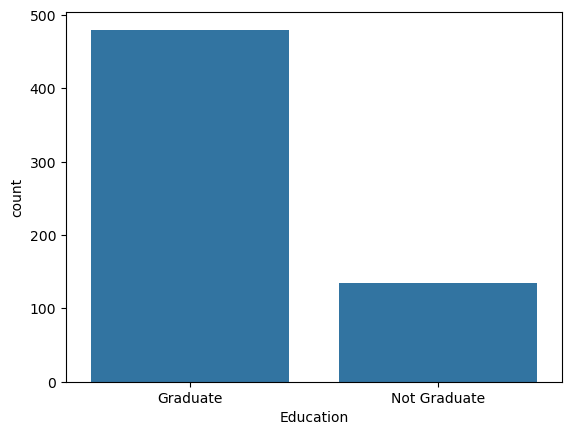

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64


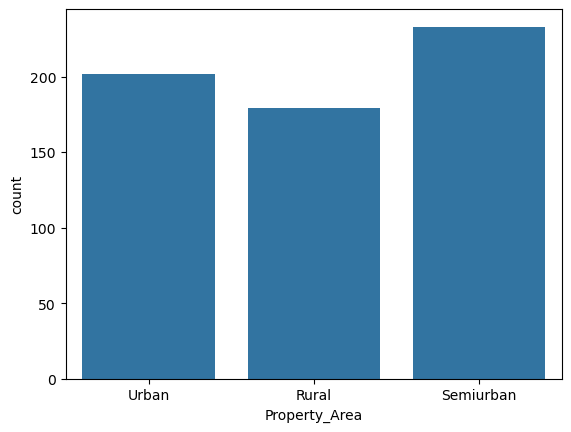

In [19]:
for oc in ord_col:
    print(train[oc].value_counts())
    print(train[oc].value_counts(normalize=True)*100)
    sns.countplot(x=oc,data=train)
    plt.show()

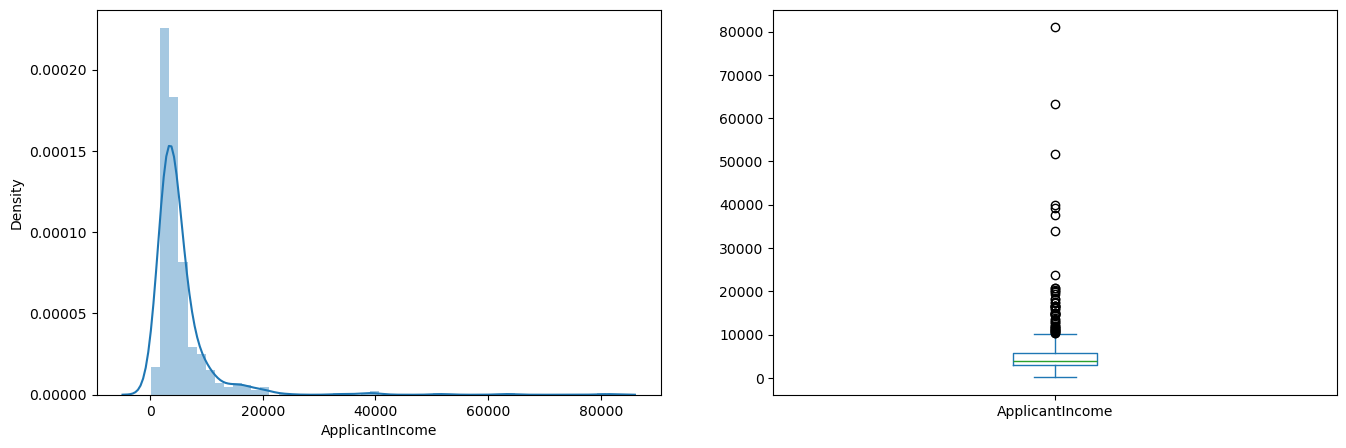

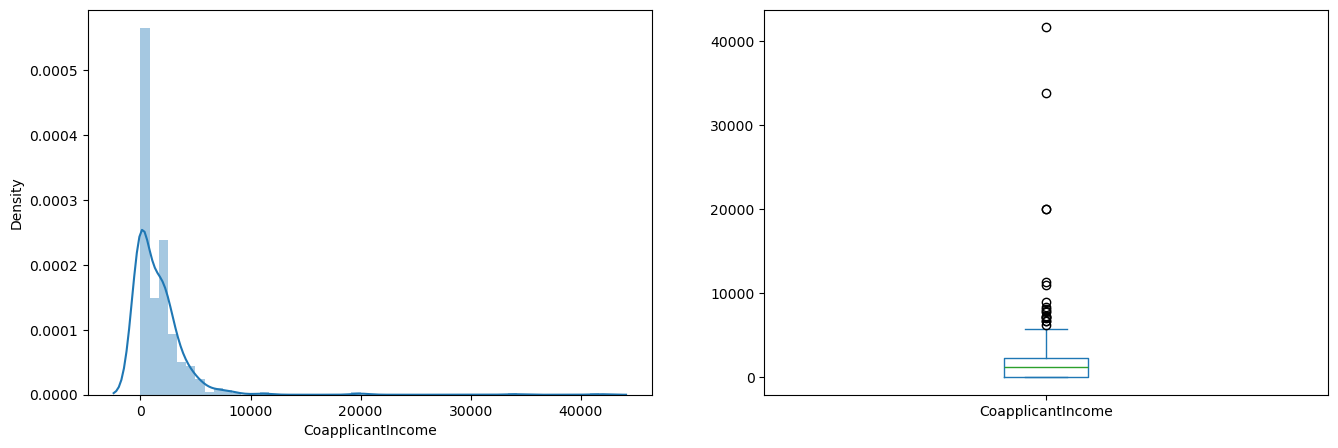

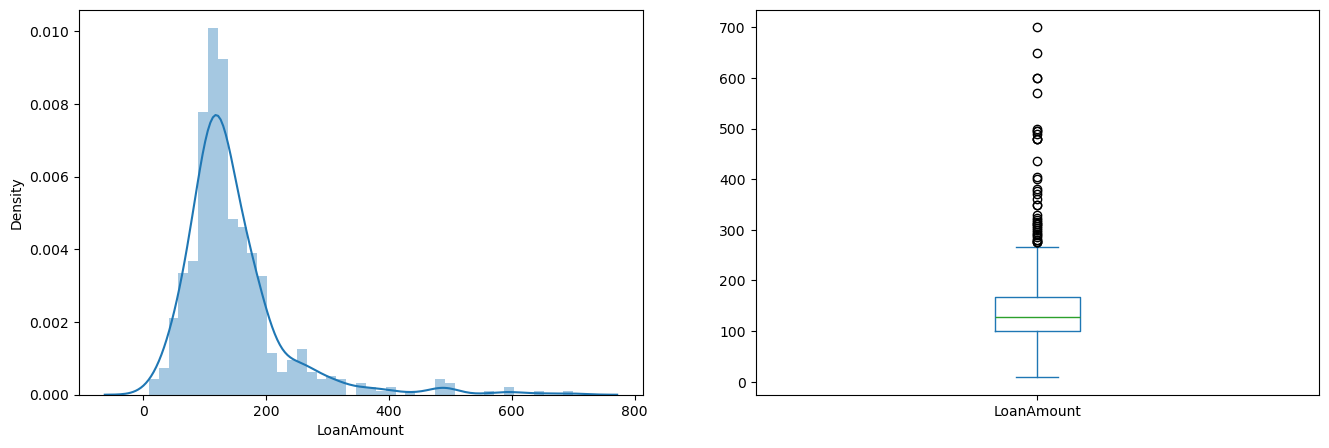

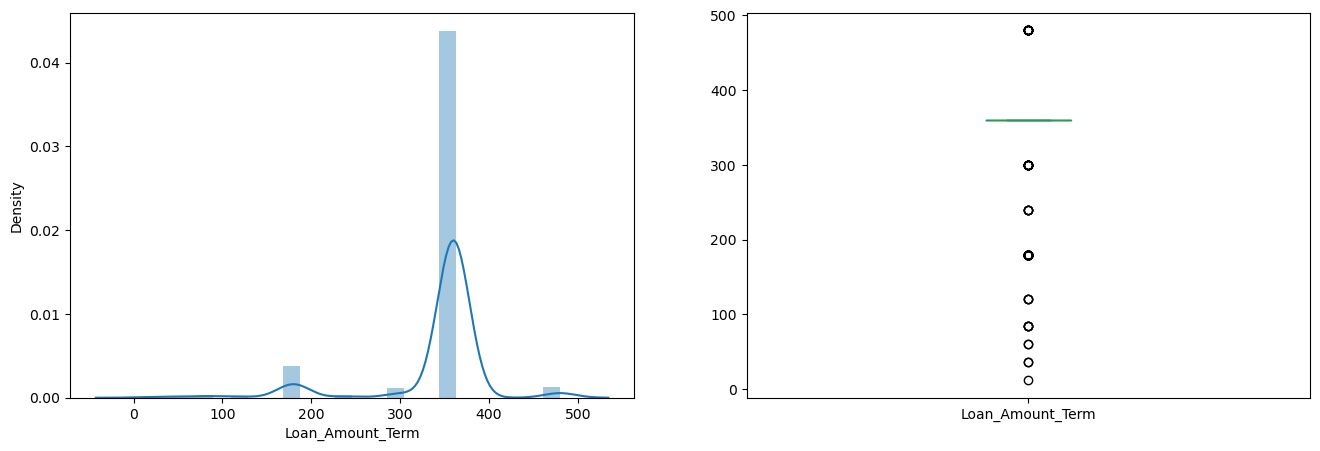

In [20]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for n in num_cols:
    plt.figure(1) 
    plt.subplot(121) 
    sns.distplot(train[n]); 
    plt.subplot(122) 
    train[n].plot.box(figsize=(16,5)) 
    plt.show()

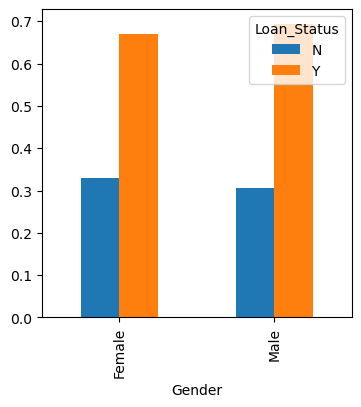

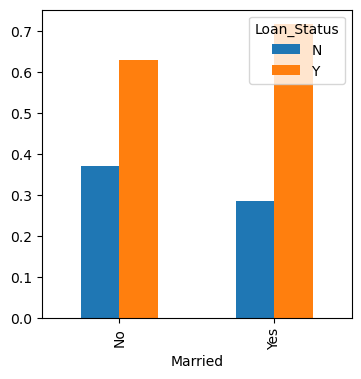

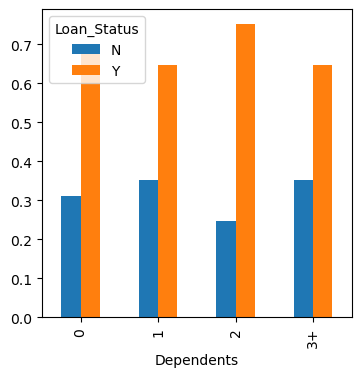

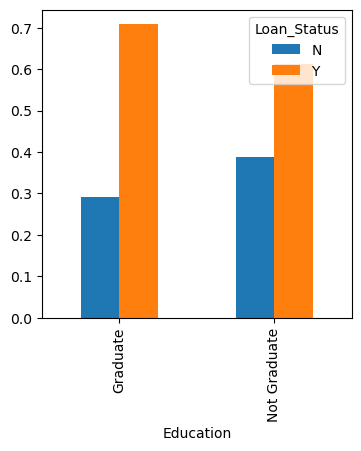

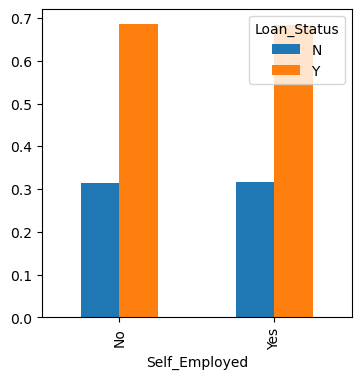

In [21]:
ic = train[['Gender','Married','Dependents','Education','Self_Employed']]
for i in ic:
    ct = pd.crosstab(train[i], train['Loan_Status'], normalize='index') * 100
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
    plt.show()

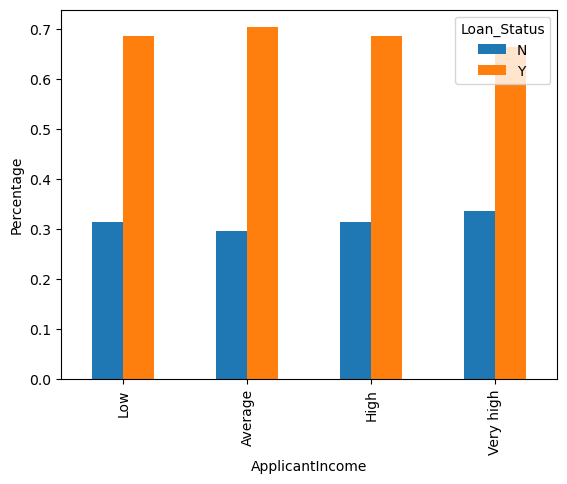

In [22]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar") 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')
plt.show()

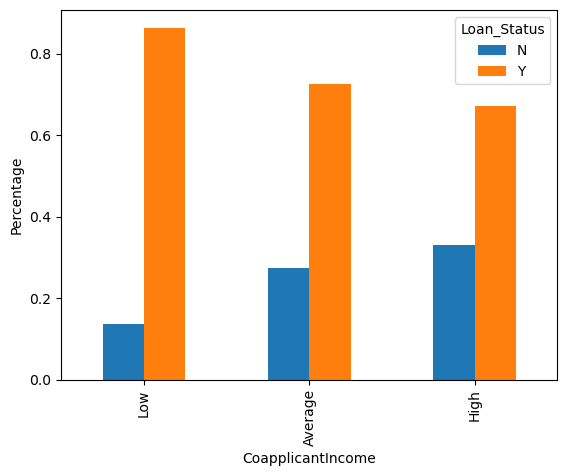

In [23]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar") 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')
plt.show()

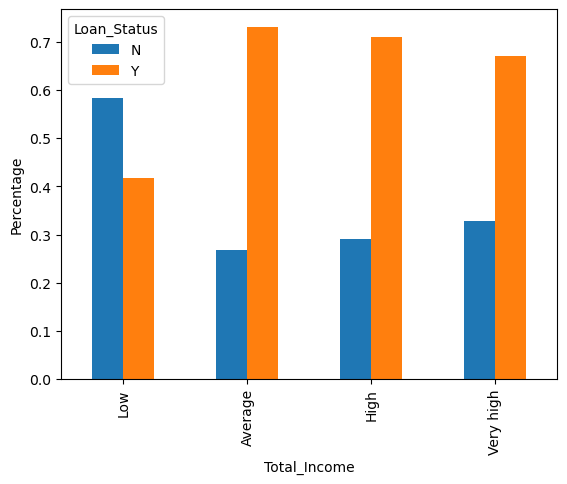

In [24]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar")
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
plt.show()

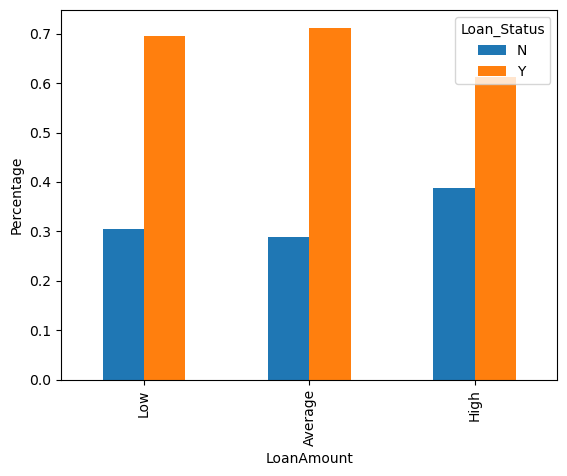

In [25]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar") 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')
plt.show()

In [26]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

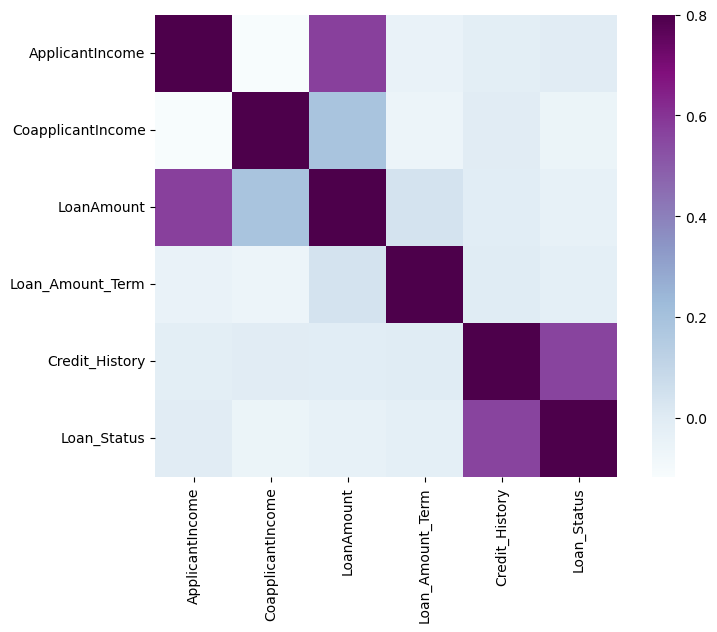

In [27]:
# Select only numeric columns
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

# Compute correlation on numeric columns only
matrix = numeric_cols.corr()

# Plot
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.show()


In [28]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [30]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [33]:
train['Loan_Amount_Term'].isnull().sum()

np.int64(0)

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [37]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [38]:
q_1 = train["LoanAmount"].quantile(0.25)
q_3 = train["LoanAmount"].quantile(0.75)

iqr = q_3 - q_1
# we defined iqr (in quantile range)

lob = q_1 - (1.5 * iqr) # lob is lower bound
upb = q_3 + (1.5 * iqr) # upb is upper bound

train["LoanAmount"] = np.where(train["LoanAmount"] < lob, lob, np.where(train["LoanAmount"] > upb, upb, train["LoanAmount"]))

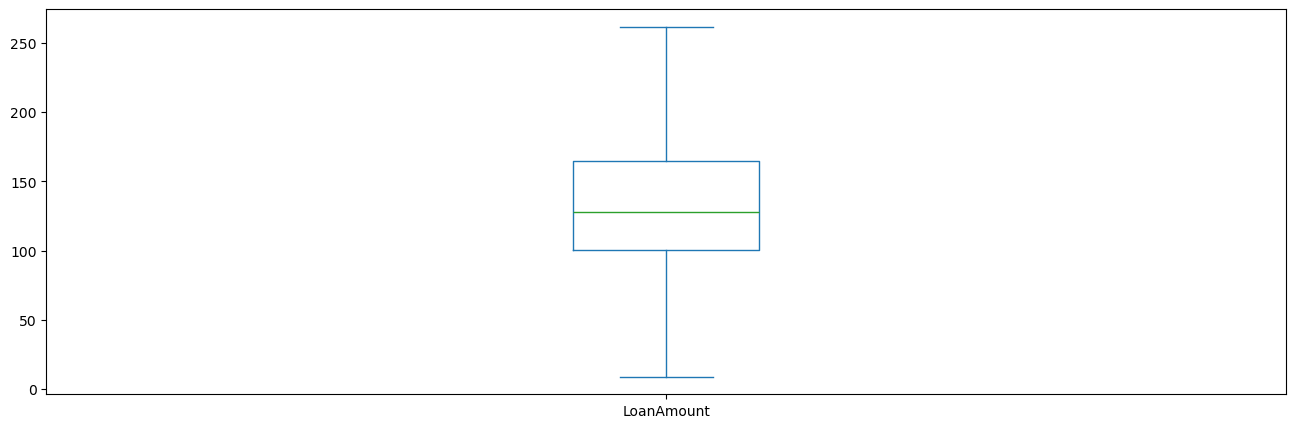

In [39]:
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [40]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [41]:
X = train.drop('Loan_Status',axis=1)
y =  train['Loan_Status']

In [42]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [44]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [46]:
pred_test = model.predict(test)

In [47]:
from sklearn.model_selection import StratifiedKFold

In [48]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.8114754098360656


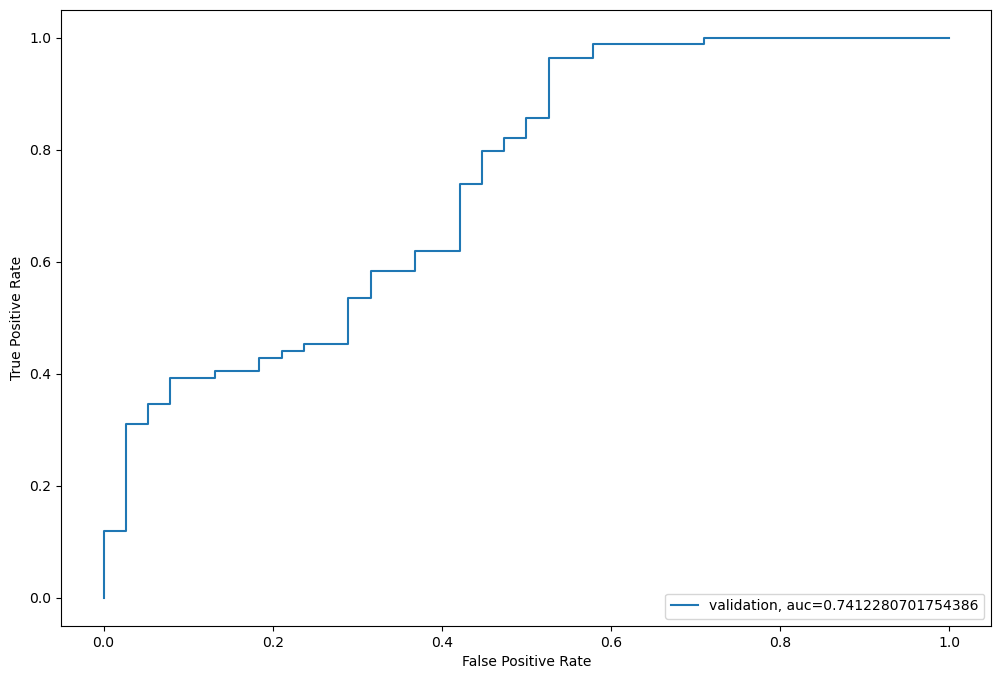

In [49]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [50]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [51]:
sns.distplot(train['Total_Income']);

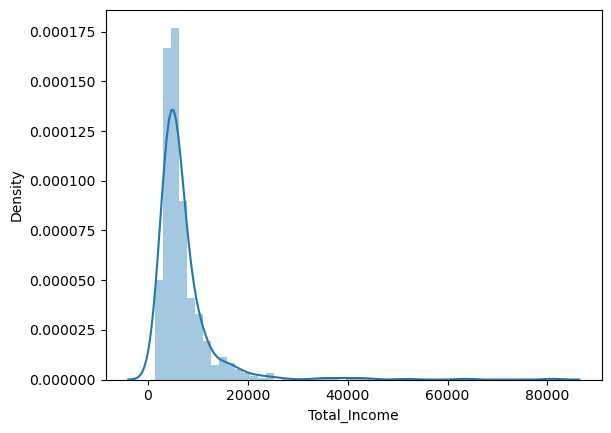

In [52]:
plt.show()

In [53]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [54]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

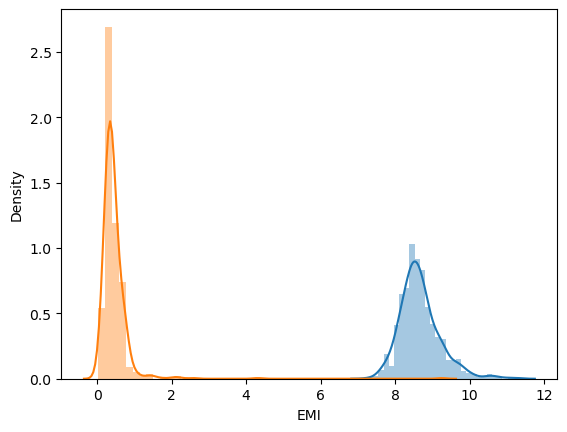

In [55]:
sns.distplot(train['EMI'])
plt.show()

In [56]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [57]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [58]:
X = train.drop('Loan_Status',axis=1) 
y = train.Loan_Status

In [59]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.8032786885245902


In [60]:
from sklearn import tree

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.6829268292682927

2 of kfold 5
accuracy_score 0.6666666666666666

3 of kfold 5
accuracy_score 0.7235772357723578

4 of kfold 5
accuracy_score 0.7154471544715447

5 of kfold 5
accuracy_score 0.680327868852459


In [61]:
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8373983739837398

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7704918032786885


In [62]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [63]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=81, random_state=1)

In [72]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(max_depth=7, n_estimators=81, random_state=1)
     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7786885245901639


In [68]:
import pkgutil
[x.name for x in pkgutil.iter_modules() if "xgboost" in x.name]


[]

In [69]:
!pip install xgboost --quiet

In [70]:
import xgboost as xgb
from xgboost import XGBClassifier

print(xgb.__version__)


3.1.1


In [73]:
from xgboost import XGBClassifier

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]


6 of kfold 5
accuracy_score 0.7886178861788617

7 of kfold 5
accuracy_score 0.7398373983739838

8 of kfold 5
accuracy_score 0.7723577235772358

9 of kfold 5
accuracy_score 0.7967479674796748

10 of kfold 5
accuracy_score 0.7786885245901639


In [ ]:
# Was XGBoost better than RandomForest?
# NO